# Data Diri
*   Nama : Adeline Hikmalia Iqbal
*   Domisili : Kota Bogor, Jawa Barat
*   No. Registrasi : 0182180120-75
*   Machine Learning - IBM

In [ ]:
%matplotlib inline
import zipfile
import os

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import Dataset

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-14 04:17:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.60MB/s    in 88s     

2021-07-14 04:18:37 (3.51 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# Extract File

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()

In [ ]:
os.listdir(base_dir)

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

# Preprocessing 

In [ ]:
train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)

# Train dan Validation Generator

In [ ]:
train_data_gen = train_data.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

val_data_gen = train_data.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Creating Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 256)        2

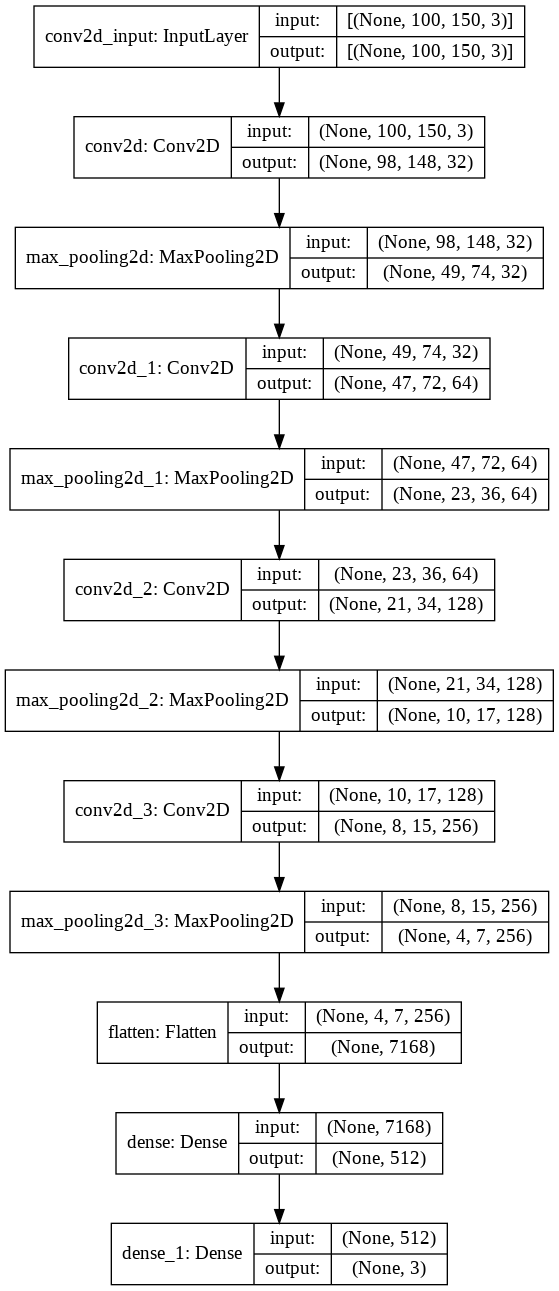

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes = True,
    show_layer_names = True,
)

# Compiling the model

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']               
)

# Callbaks

In [ ]:
# misal akurasi threshold 96%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy')>0.96:
            print("\nAkurasi telah mencapai > 96%!")
            self.model.stop_training = True

# Train Model

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = val_data_gen,
    validation_steps = 5,
    verbose = 2,
    callbacks = [myCallback()]
)

Epoch 1/20
25/25 - 32s - loss: 1.1278 - accuracy: 0.3597 - val_loss: 1.0754 - val_accuracy: 0.3500
Epoch 2/20
25/25 - 30s - loss: 0.9774 - accuracy: 0.5000 - val_loss: 0.8506 - val_accuracy: 0.6438
Epoch 3/20
25/25 - 30s - loss: 0.7832 - accuracy: 0.6351 - val_loss: 0.8612 - val_accuracy: 0.5813
Epoch 4/20
25/25 - 30s - loss: 0.6610 - accuracy: 0.7169 - val_loss: 0.5180 - val_accuracy: 0.8438
Epoch 5/20
25/25 - 31s - loss: 0.5429 - accuracy: 0.7727 - val_loss: 0.7868 - val_accuracy: 0.6938
Epoch 6/20
25/25 - 30s - loss: 0.6144 - accuracy: 0.7156 - val_loss: 0.4855 - val_accuracy: 0.8438
Epoch 7/20
25/25 - 30s - loss: 0.4212 - accuracy: 0.8260 - val_loss: 0.3482 - val_accuracy: 0.8938
Epoch 8/20
25/25 - 30s - loss: 0.5357 - accuracy: 0.7779 - val_loss: 0.6937 - val_accuracy: 0.6125
Epoch 9/20
25/25 - 30s - loss: 0.3842 - accuracy: 0.8506 - val_loss: 0.2368 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 31s - loss: 0.2182 - accuracy: 0.9237 - val_loss: 0.3381 - val_accuracy: 0.9000
Epoch 11/

# Evaluasi Model

In [ ]:
model_score = model.evaluate(val_data_gen,steps=20)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

20/20 [==============================] - 9s 421ms/step - loss: 0.1067 - accuracy: 0.9656
Model Test Loss: 0.10674332082271576
Model Test Accuracy: 0.965624988079071


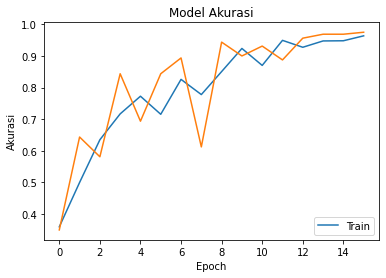

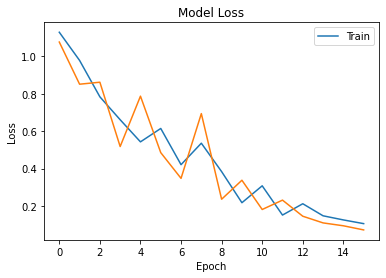

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label = 'Training Acc')
plt.plot(val_acc, label = 'Validasi Acc')
plt.title('Model Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'lower right')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validasi Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper right')
plt.show()

# Prediksi Gambar

Saving scissor.jpg to scissor (6).jpg
scissor.jpg


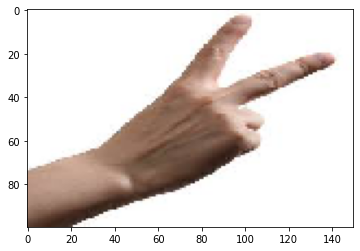

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size = (100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  
  print(fn)
  if classes[0,0] == 0:
    print('paper')
  elif classes[0,1] == 1:
    print('rock')
  elif classes[0,2] == 1:
    print('scissors')